<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/03_curso_tensorflow_certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

--2022-10-30 19:34:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   244MB/s    in 0.4s    

2022-10-30 19:34:20 (244 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [4]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

  plt.axis('off')
  print(f"Image shape : {img.shape}")
  return img

Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


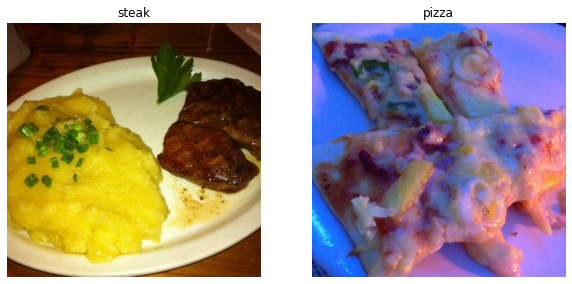

In [8]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
img2 = view_random_image("pizza_steak/train/", "pizza")

In [76]:
img/255.

array([[[0.41960784, 0.24313725, 0.35686275],
        [0.41960784, 0.24313725, 0.35686275],
        [0.41960784, 0.24313725, 0.35686275],
        ...,
        [0.4       , 0.25098039, 0.33333333],
        [0.39215686, 0.24313725, 0.3254902 ],
        [0.37647059, 0.22745098, 0.30980392]],

       [[0.41960784, 0.2627451 , 0.36862745],
        [0.42352941, 0.26666667, 0.37254902],
        [0.42745098, 0.27058824, 0.37647059],
        ...,
        [0.38431373, 0.23529412, 0.31764706],
        [0.39215686, 0.24313725, 0.3254902 ],
        [0.39607843, 0.24705882, 0.32941176]],

       [[0.37254902, 0.23921569, 0.33333333],
        [0.38823529, 0.25490196, 0.34901961],
        [0.40784314, 0.2745098 , 0.36862745],
        ...,
        [0.38039216, 0.24313725, 0.32156863],
        [0.38039216, 0.24313725, 0.32156863],
        [0.37254902, 0.23529412, 0.31372549]],

       ...,

       [[0.95686275, 0.95294118, 0.97254902],
        [0.96078431, 0.95686275, 0.97647059],
        [0.96470588, 0

#Model Baseline

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

                        
model1.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history1 = model1.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Basic model without convolutions

In [80]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])


history2 = model2.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = train_data, validation_steps = len(train_data))

Epoch 1/5
47/47 [==============================] - 20s 410ms/step - loss: 0.7686 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 16s 340ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 337ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 16s 337ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 16s 337ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [81]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [82]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model3.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])


history3 = model3.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = train_data, validation_steps = len(train_data))

Epoch 1/5
47/47 [==============================] - 21s 433ms/step - loss: 3.6827 - accuracy: 0.6113 - val_loss: 2.8427 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 21s 439ms/step - loss: 1.3098 - accuracy: 0.6827 - val_loss: 1.1131 - val_accuracy: 0.5960
Epoch 3/5
47/47 [==============================] - 20s 432ms/step - loss: 0.9507 - accuracy: 0.6813 - val_loss: 0.4415 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 20s 427ms/step - loss: 0.5286 - accuracy: 0.7767 - val_loss: 0.4089 - val_accuracy: 0.8287
Epoch 5/5
47/47 [==============================] - 20s 425ms/step - loss: 0.5647 - accuracy: 0.7500 - val_loss: 0.4270 - val_accuracy: 0.8173


In [83]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#Full process
1) Visualize data.

2) Preprocess data.

3) Create a baseline model.


4) Fit the model.

5) Evaluate the model.

6) Adjust different parameters and improve model.

7) Repeat until satisfied.

#1) Visualize data.

Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


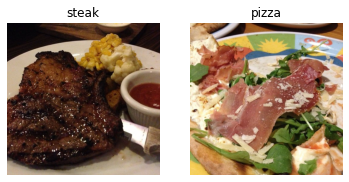

In [84]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')


#2)Preprocess data

In [12]:
train_ditr = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

#3) Create a baseline model

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [15]:
model4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [92]:
model4.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

#4) Fit the model
steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)


validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [93]:
history4 = model4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 139s 3s/step - loss: 2.2220 - accuracy: 0.5660 - val_loss: 0.6128 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 133s 3s/step - loss: 0.4783 - accuracy: 0.7753 - val_loss: 0.4151 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 128s 3s/step - loss: 0.4102 - accuracy: 0.8133 - val_loss: 0.4429 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 134s 3s/step - loss: 0.2871 - accuracy: 0.8927 - val_loss: 0.4088 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 135s 3s/step - loss: 0.1687 - accuracy: 0.9453 - val_loss: 0.5072 - val_accuracy: 0.7920


#5) Model evaluation

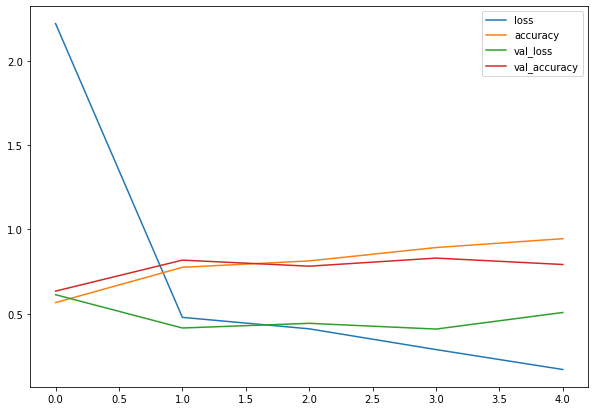

In [94]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [16]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

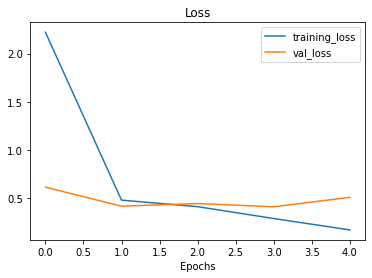

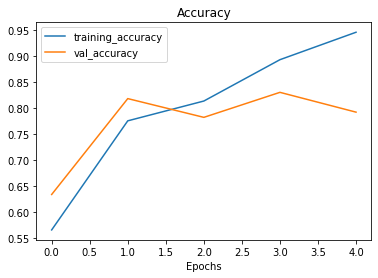

In [96]:
plot_loss_curves(history4)

In [97]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#6) Adjust the model parameters
Step 0 : Create a baseline

Step1 : Beath the baseline by overfitting a larger model.
  - Increase the number of convolutional layers.
  - Increase the number of convolutional filters.
  - Add another dense layer to the output of our flattened layer

Step2: Recude overfitting.

In [103]:
#We will build 2 more models:
# A ConvNet with maxpooling
# A ConvNet with maxpooling and data augmentation
tf.random.set_seed(42)

model5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [104]:
model5.compile(loss='binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])
history5 = model5.fit(train_data,
           epochs=5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5905 - accuracy: 0.6833 - val_loss: 0.4735 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.4961 - accuracy: 0.7693 - val_loss: 0.4501 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.4529 - accuracy: 0.7960 - val_loss: 0.3695 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.4318 - accuracy: 0.8000 - val_loss: 0.3979 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.3958 - accuracy: 0.8247 - val_loss: 0.3159 - val_accuracy: 0.8580


In [105]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 10)      

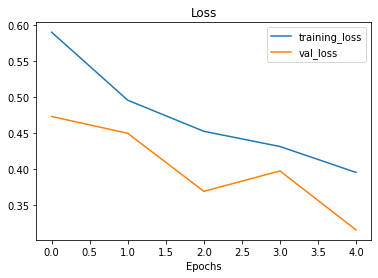

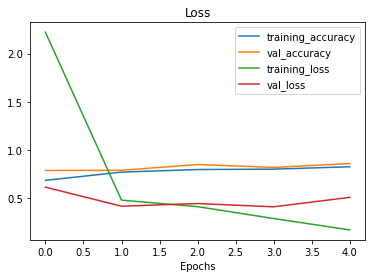

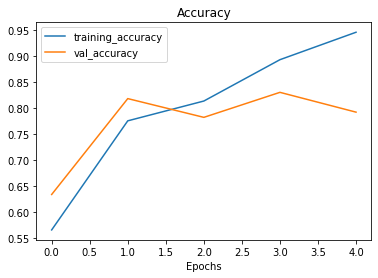

In [108]:
plot_loss_curves(history5)


##Data Augmentation!!

In [20]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
print('Augmented training images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)

print('Non augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32, 
                                               class_mode = 'binary',
                                               shuffle = False)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size = 32, 
                                               class_mode = 'binary',
                                               shuffle = False)

Augmented training images:
Found 1500 images belonging to 2 classes.
Non augmented training images:
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

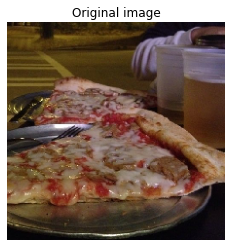

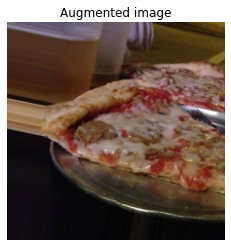

In [32]:
#Show original and augmented image.
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [33]:
model6 = Sequential([
    Conv2D(10,3,activation='relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model6.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

model6.fit(train_data_augmented,
           epochs=5,
           steps_per_epoch = len(train_data_augmented),
           validation_data = test_data,
           validation_steps = len(test_data))

#No entiendo muy bien xq en el notebook le da 0.85... Que he escrito mal?

Epoch 1/5
47/47 [==============================] - 72s 1s/step - loss: 0.7126 - accuracy: 0.4987 - val_loss: 0.6958 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.6934 - accuracy: 0.5300 - val_loss: 0.6915 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6916 - accuracy: 0.5600 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.7097 - accuracy: 0.4000 - val_loss: 0.6925 - val_accuracy: 0.5560
Epoch 5/5
47/47 [==============================] - 77s 2s/step - loss: 0.6931 - accuracy: 0.4807 - val_loss: 0.6918 - val_accuracy: 0.5560


In [35]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [117]:
model7 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model7.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

history7 = model7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch = len(train_data_augmented_shuffled),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 100s 2s/step - loss: 0.6548 - accuracy: 0.5867 - val_loss: 0.7541 - val_accuracy: 0.5333
Epoch 2/5
47/47 [==============================] - 99s 2s/step - loss: 0.5198 - accuracy: 0.7367 - val_loss: 1.0035 - val_accuracy: 0.4594
Epoch 3/5
47/47 [==============================] - 98s 2s/step - loss: 0.4902 - accuracy: 0.7693 - val_loss: 1.1507 - val_accuracy: 0.4494
Epoch 4/5
47/47 [==============================] - 98s 2s/step - loss: 0.4906 - accuracy: 0.7640 - val_loss: 0.7527 - val_accuracy: 0.5909
Epoch 5/5
47/47 [==============================] - 98s 2s/step - loss: 0.4667 - accuracy: 0.7847 - val_loss: 0.8855 - val_accuracy: 0.5627


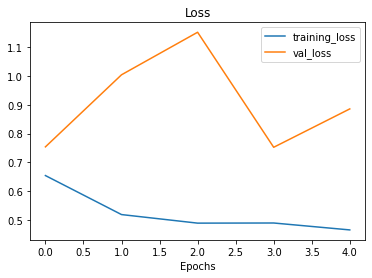

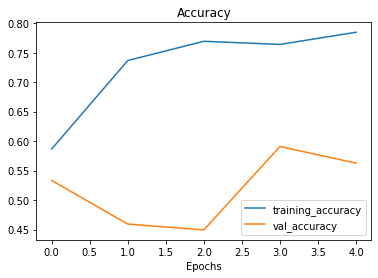

In [118]:
plot_loss_curves(history7)

#7) Repeat until satisfied
Things to try to continue improving the model:
- Increase the number of model layers.

- Increase the number of filters in each convolutional layer.

- Train for longer (+epochs).

- Finding an ideal learning_rate.

- Get more data.

- Use transfer learning

#Making predictions

--2022-10-30 20:16:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-10-30 20:16:58 (31.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

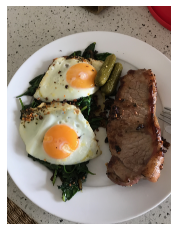

In [41]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [42]:
steak.shape

(4032, 3024, 3)

In [60]:
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

In [56]:
model7.predict(steak)

ValueError: ignored

## It doesn't work because we were working with batch_size so we have to reshape.

In [61]:
print(f'Shape before new dimension: {steak.shape}')
steak = tf.expand_dims(steak, axis=0)
print(f'Shape after new dimension: {steak.shape}')


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [62]:
pred = model7.predict(steak)
pred

1/1 [==============================] - 0s 420ms/step


array([[0.799592]], dtype=float32)

In [64]:
class_names
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

1/1 [==============================] - 0s 42ms/step


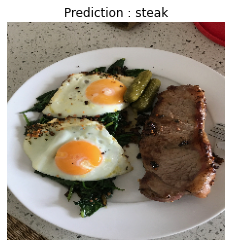

In [72]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)

  plt.title(f'Prediction : {pred_class}')
  plt.axis(False)

pred_and_plot(model7, '03-steak.jpeg', class_names)

--2022-10-30 20:34:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-10-30 20:34:06 (33.6 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

1/1 [==============================] - 0s 30ms/step


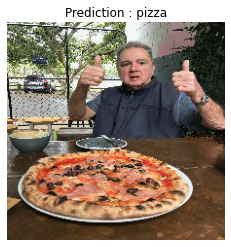

In [73]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model7, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification
## 1) Import data

In [75]:
import zipfile

In [79]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-10-30 21:39:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M   230MB/s    in 2.2s    

2022-10-30 21:39:29 (230 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [85]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [86]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (382, 512, 3)


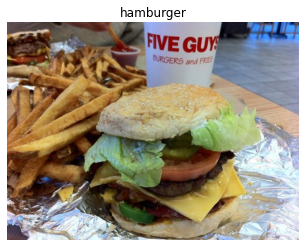

In [87]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

# 2) Preprocess data

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Create baseline

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model9 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model9.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history9 = model9.fit(train_data,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

235/235 [==============================] - 572s 2s/step - loss: 2.1305 - accuracy: 0.2209 - val_loss: 1.9564 - val_accuracy: 0.2944


#5) Evaluate model

In [98]:
# plot_loss_curves(history9)

#6) Adjust model parameters.
Too long to train...

#7) Make predictions

In [99]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [100]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 181ms/step


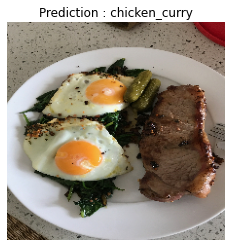

In [102]:
pred_and_plot(model = model9, filename = '03-steak.jpeg', class_names = class_names)

1/1 [==============================] - 0s 71ms/step


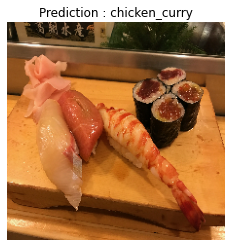

In [103]:
pred_and_plot(model9, '03-sushi.jpeg', class_names)

1/1 [==============================] - 0s 38ms/step


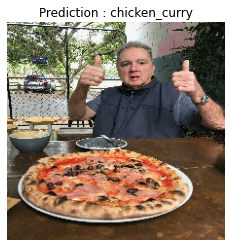

In [104]:
pred_and_plot(model9, '03-pizza-dad.jpeg', class_names)

1/1 [==============================] - 0s 71ms/step


(-0.5, 223.5, 223.5, -0.5)

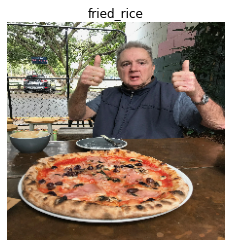

In [108]:
# There is a problem because our latest model was a binary one and the pred and plot function work like that way.
img = load_and_prep_image('03-pizza-dad.jpeg')
pred = model9.predict(tf.expand_dims(img, axis=0))
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False)

1/1 [==============================] - 0s 136ms/step


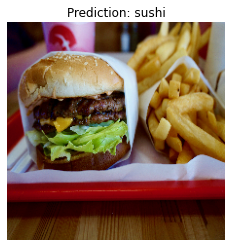

In [113]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

pred_and_plot(model9, '03-steak.jpeg', class_names)
pred_and_plot(model9, '03-hamburger.jpeg', class_names)

# Save Models

In [115]:
model9.save('saved_trained_model')

In [116]:
loaded_model9 = tf.keras.models.load_model('saved_trained_model')
loaded_model9.evaluate(test_data)

79/79 [==============================] - 37s 454ms/step - loss: 0.7905 - accuracy: 0.6078


[0.7904533743858337, 0.6078400611877441]